In [24]:
#!pip install zeus-mcmc
#!pip install emcee
#!pip install getdist
#python -m pip install drawdata
#python -m pip install corner
import time
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import zeus
import pandas as pd
from drawdata import ScatterWidget
from drawdata import BarWidget
import emcee
import corner



In [34]:
widget_bars = BarWidget(collection_names=["estrellas", "quasares",'galaxias'], n_bins=65)
widget_bars

BarWidget(collection_names=['estrellas', 'quasares', 'galaxias'], n_bins=65)

In [35]:
𝘄𝗶𝗱𝗴𝗲𝘁 = 𝗦𝗰𝗮𝘁𝘁𝗲𝗿𝗪𝗶𝗱𝗴𝗲𝘁() 
𝘄𝗶𝗱𝗴𝗲𝘁 

ScatterWidget()

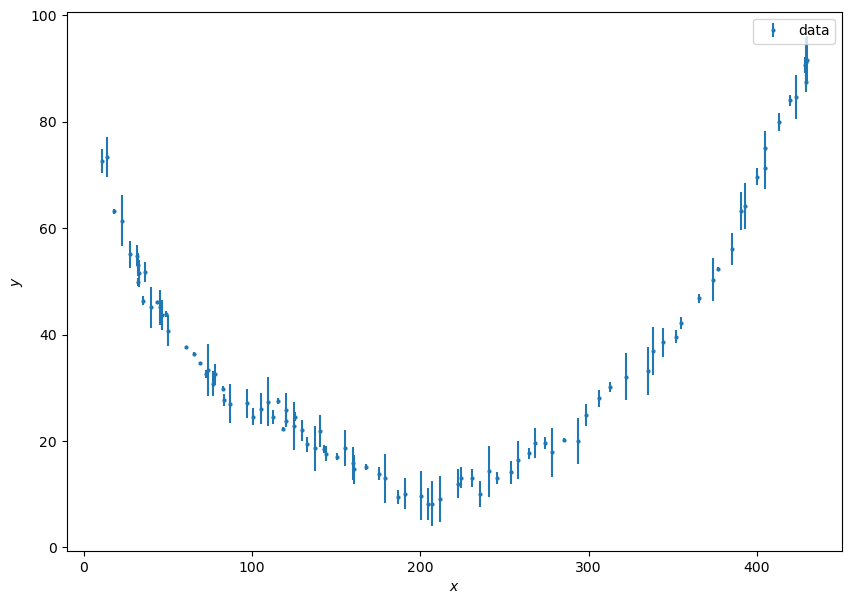

In [87]:
W = widget.data_as_pandas
W['sigma'] = np.abs(np.random.uniform(0.1, 5.0, size=len(W)))

plt.figure(figsize=(10,7))
plt.errorbar(W['x'], W['y'], yerr=W['sigma'], fmt="o", label='data',markersize=2)
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

### Modelo lineal

$$f(x)  = \alpha x + \beta $$

$$\theta(\alpha,\beta)$$

In [74]:
def logprior(theta):
    lp = 0.
    alpha, beta= theta
    if (-10 < alpha < 10) or (-10 < beta < 10):
        return lp
    return -np.inf

def linear_model(x, alpha, beta):
    return (alpha*x) + beta


def loglike(theta, y, sigma, x):
    alpha, beta = theta
    model = linear_model(x, alpha, beta)
    return -0.5*np.sum(((model - y)/sigma)**2 + np.log(2*np.pi*sigma**2))

def logpost(theta, y, sigma, x):
    return logprior(theta) + loglike(theta, y, sigma, x)


In [75]:
ndim = 2 
nwalkers = 10 
nsteps = 1000
start = 0.1 * np.random.randn(nwalkers, ndim)

sampler = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[np.array(W['y']), np.array(W['sigma']), np.array(W['x'])])
sampler.run_mcmc(start, nsteps)
sampler.summary

Initialising ensemble of 10 walkers...
Sampling progress : 100%|██████████| 1000/1000 [00:07<00:00, 136.20it/s]
Summary
-------
Number of Generations: 1000
Number of Parameters: 2
Number of Walkers: 10
Number of Tuning Generations: 18
Scale Factor: 0.840019
Mean Integrated Autocorrelation Time: 3.52
Effective Sample Size: 2837.56
Number of Log Probability Evaluations: 55292
Effective Samples per Log Probability Evaluation: 0.05132


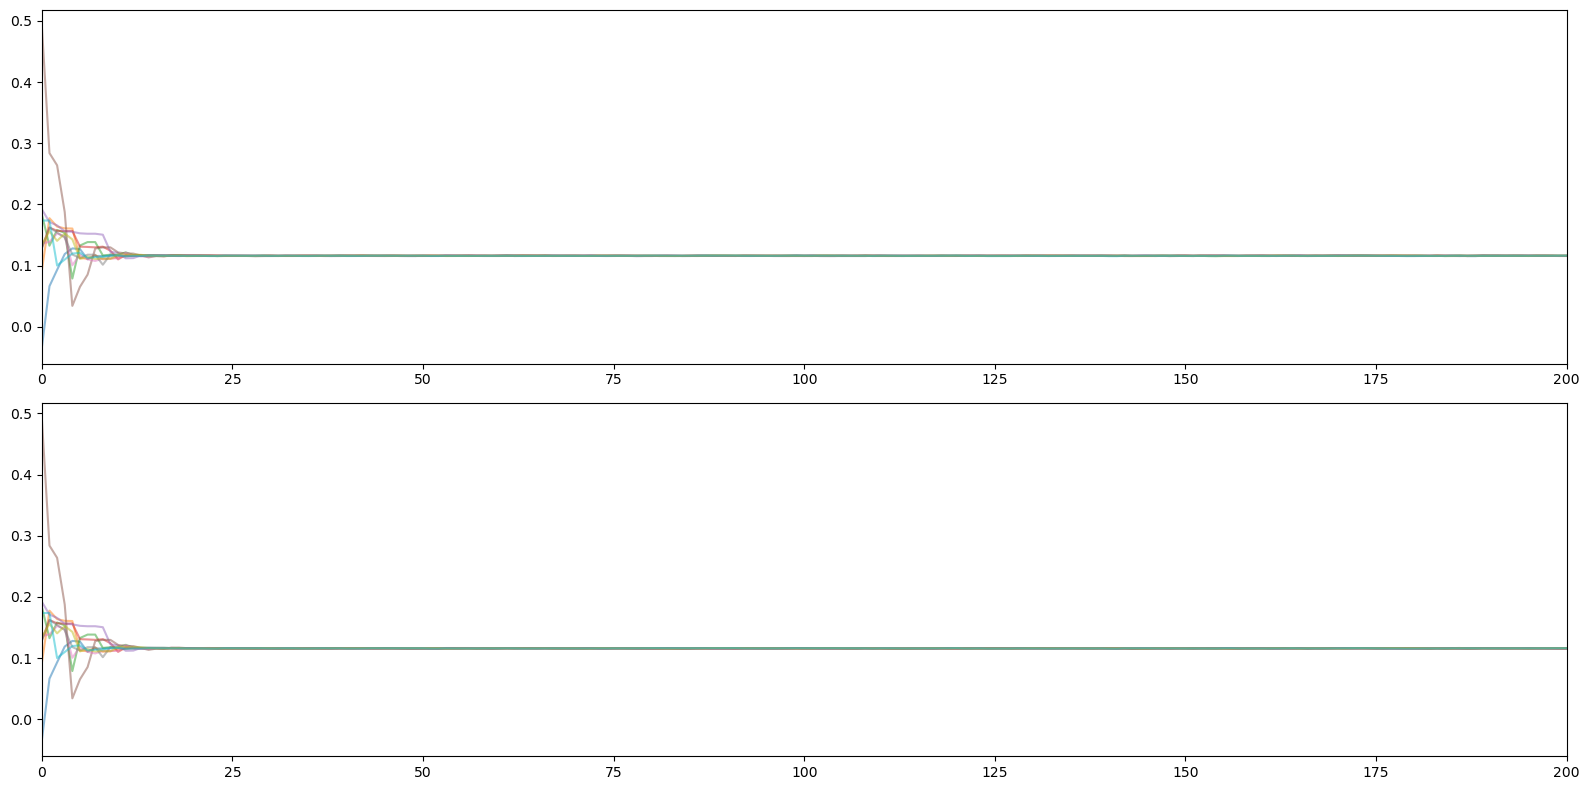

In [76]:
plt.figure(figsize=(16,4.0*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler.get_chain()[:,:,0], alpha=0.5)
    plt.xlim(0,200)
plt.tight_layout()
plt.show()


/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(


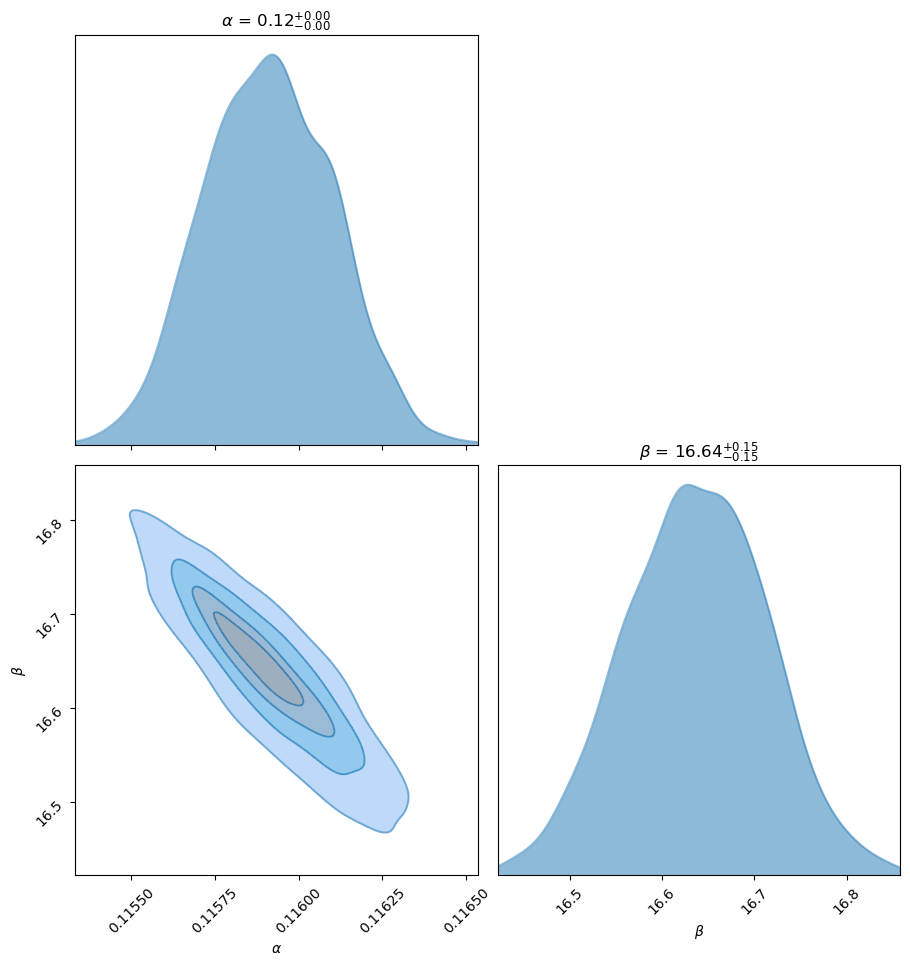

In [77]:
# flatten the chains, thin them by a factor of 10, and remove the burn-in (first half of the chain)
chain = sampler.get_chain(flat=True, discard=100, thin=10)

# plot marginal posterior distributions
fig, axes = zeus.cornerplot(chain, labels=[r'$\alpha$',r'$\beta$']);

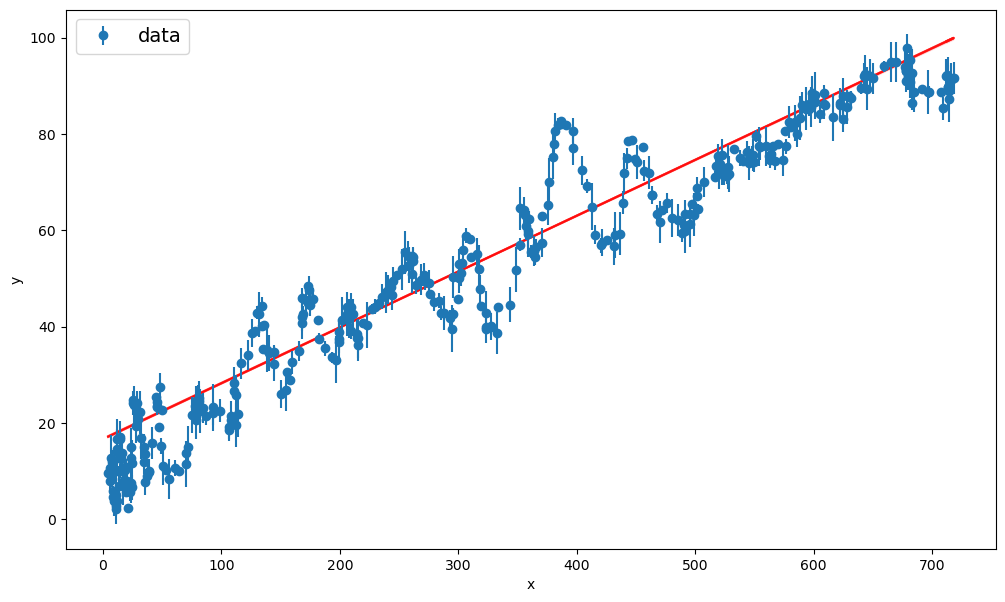

In [78]:
inds = np.random.randint(len(chain), size=25)
plt.figure(figsize=(12,7))
for i in inds:
    sample = chain[i]
    plt.plot(W['x'], np.dot(np.vander(W['x'], 2), sample[:2]), color = 'red', alpha=0.1)
plt.errorbar(W['x'], W['y'], yerr=W['sigma'], fmt="o", label='data')
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");

In [79]:
labels=[r'\alpha',r'\beta']
for i in range(ndim):
    mcmc = np.percentile(chain[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Parabola


$$f(x)  = \alpha x^2 + \beta x + \zeta$$

$$\theta(\alpha,\beta,\zeta)$$

In [88]:
def logprior(theta):
    lp = 0.
    alpha, beta, zeta= theta
    if (-10 < alpha < 10) or (-10 < beta < 10) or (-10 < zeta < 10):
        return lp
    return -np.inf

def parabola_model(x, alpha, beta, zeta):
    return (alpha*(x**2)) + beta*x + zeta


def loglike(theta, y, sigma, x):
    alpha, beta, zeta = theta
    model = parabola_model(x, alpha, beta,zeta)
    return -0.5*np.sum(((model - y)/sigma)**2)

def logpost(theta, y, sigma, x):
    return logprior(theta) + loglike(theta, y, sigma, x)


In [89]:
ndim = 3
nwalkers = 12 
nsteps = 1000
start = 0.1 * np.random.randn(nwalkers, ndim)

sampler = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[np.array(W['y']), np.array(W['sigma']), np.array(W['x'])])
sampler.run_mcmc(start, nsteps)
sampler.summary

Initialising ensemble of 12 walkers...
Sampling progress : 100%|██████████| 1000/1000 [00:06<00:00, 161.25it/s]
Summary
-------
Number of Generations: 1000
Number of Parameters: 3
Number of Walkers: 12
Number of Tuning Generations: 65
Scale Factor: 1.00363
Mean Integrated Autocorrelation Time: 5.02
Effective Sample Size: 2390.28
Number of Log Probability Evaluations: 62132
Effective Samples per Log Probability Evaluation: 0.038471


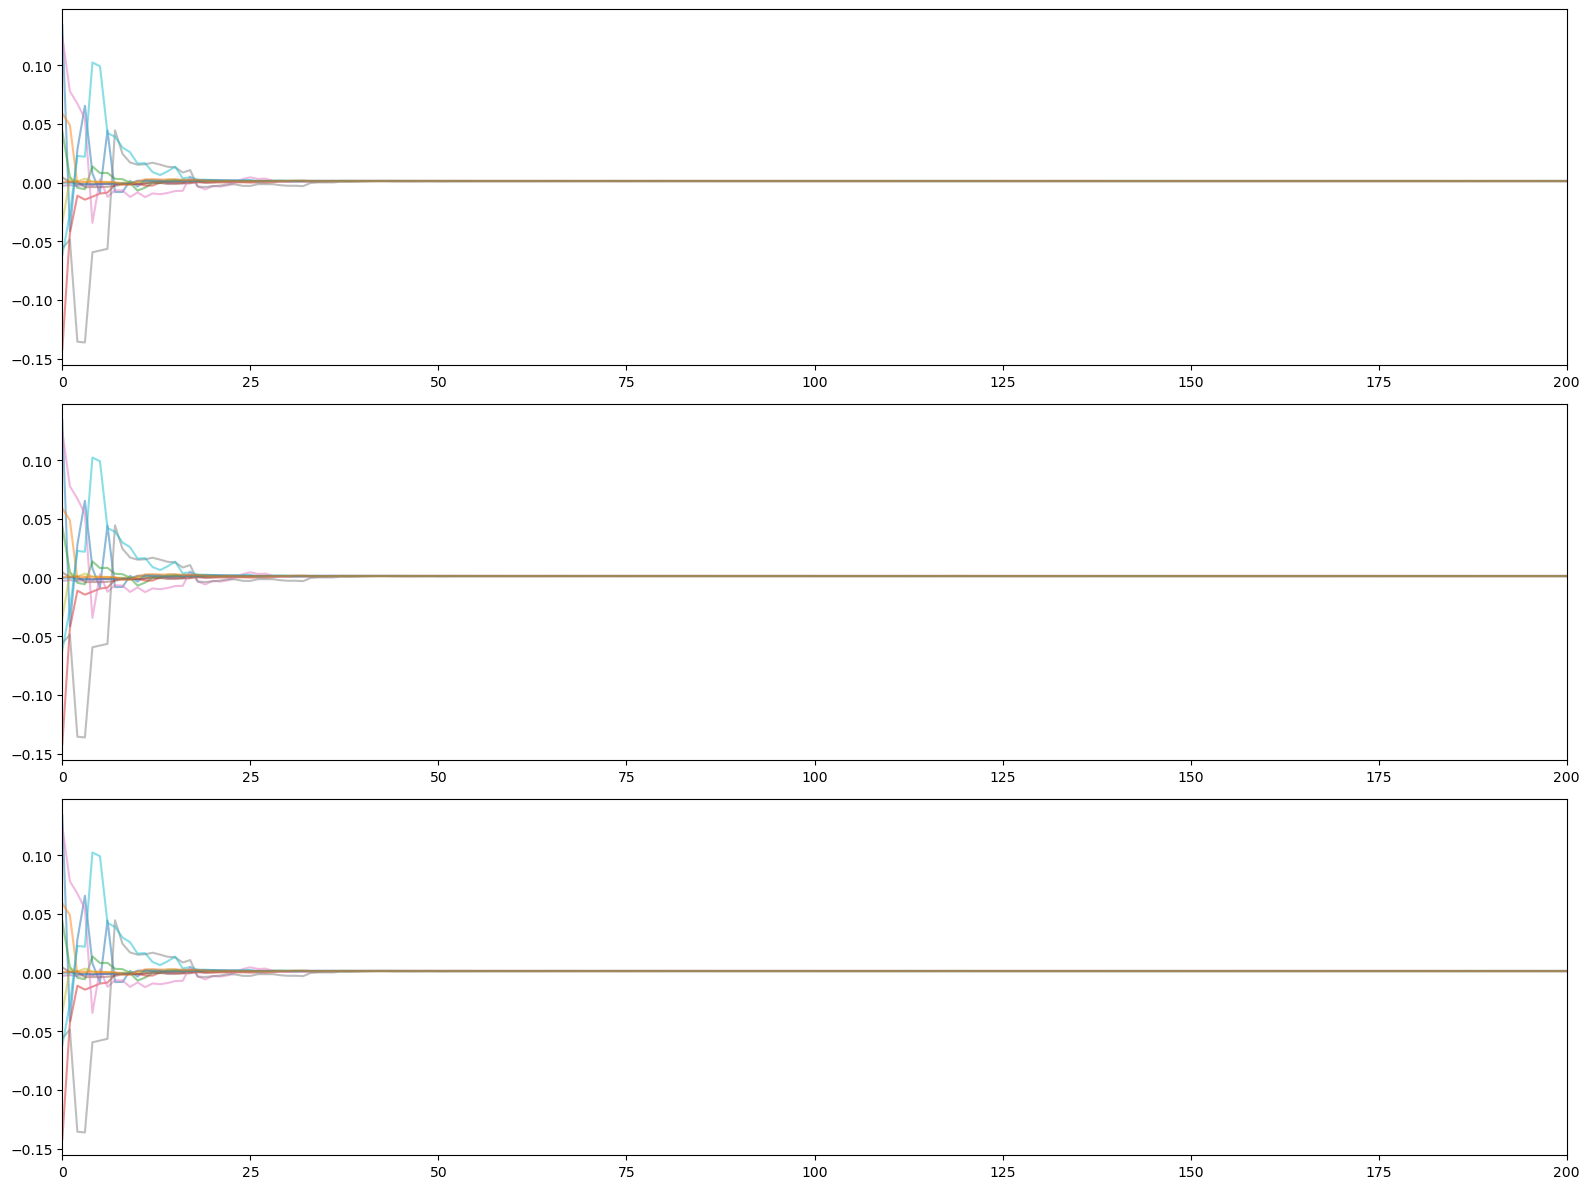

In [90]:
plt.figure(figsize=(16,4.0*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler.get_chain()[:,:,0], alpha=0.5)
    plt.xlim(0,200)
plt.tight_layout()
plt.show()

/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/python3.11/site-packages/seaborn/distributions.py:1176: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
/home/holman/miniconda3/envs/cosmos/lib/pytho

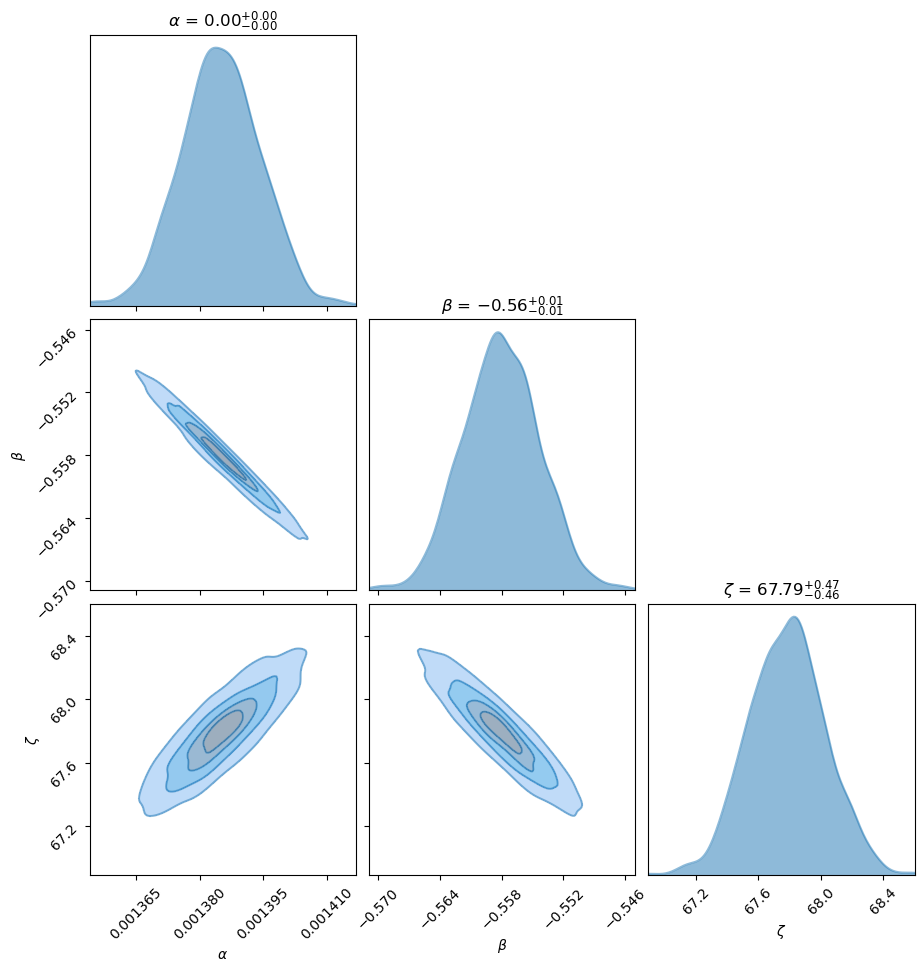

In [ ]:
# flatten the chains, thin them by a factor of 10, and remove the burn-in (first half of the chain)
chain = sampler.get_chain(flat=True, discard=100, thin=10)

# plot marginal posterior distributions
fig, axes = zeus.cornerplot(chain, labels=[r'$\alpha$',r'$\beta$',r'$\zeta$']);

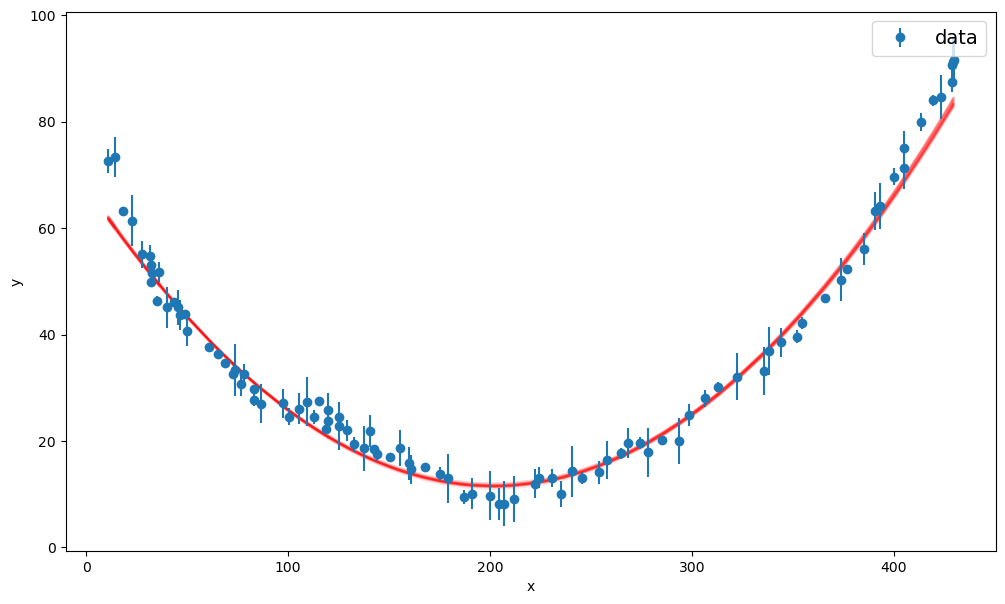

In [92]:
inds = np.random.randint(len(chain), size=25)
plt.figure(figsize=(12,7))
for i in inds:
    sample = chain[i]
    plt.plot(W['x'], np.dot(np.vander(W['x'], 3), sample[:3]), color = 'red', alpha=0.1)
plt.errorbar(W['x'], W['y'], yerr=W['sigma'], fmt="o", label='data')
plt.legend(fontsize=14)
plt.xlabel("x")
plt.ylabel("y");

In [93]:
labels=[r'\alpha',r'\beta','\zeta']
for i in range(ndim):
    mcmc = np.percentile(chain[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Modelo de Milankovitch

![Image of Yaktocat](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/MilankovitchCyclesOrbitandCores.png/960px-MilankovitchCyclesOrbitandCores.png)




$$\Delta T  = a_1 \text{sen}  \Bigg( \frac{2\pi t}{p_1} \Bigg)  + a_2 \text{sen}  \Bigg( \frac{2\pi t}{p_2} \Bigg)  + a_3 \text{sen}  \Bigg( \frac{2\pi t}{p_3} \Bigg)   + T_0$$

In [2]:
start_time = time.time()

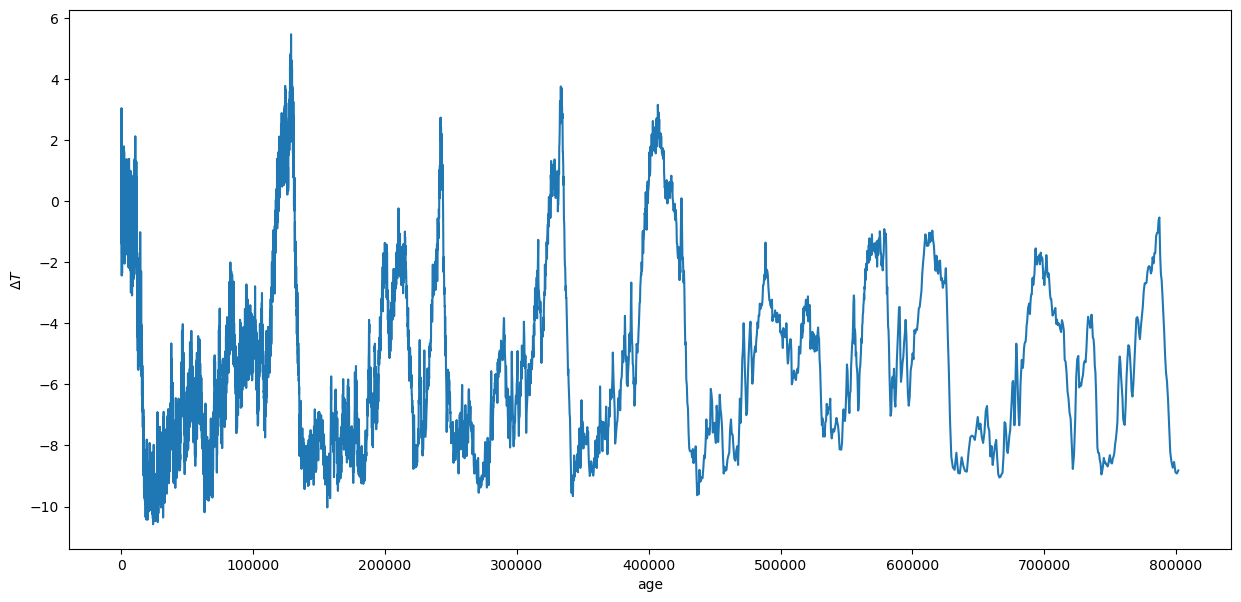

In [3]:

plt.rcParams['figure.figsize'] = (20,10)

ice_data = np.loadtxt('Milankovitch.txt')
ice_data = np.transpose(ice_data)
age = ice_data[2]
T = ice_data[4]
plt.figure(figsize=(15,7))
plt.plot(age,T)
plt.xlabel('age')
plt.ylabel(r'$\Delta T$')
plt.show()

In [4]:
def model(theta,age=age):
    a1,a2,a3,p1,p2,p3,T0 = theta
    return a1*np.sin(2*np.pi*age/p1) + a2*np.sin(2*np.pi*age/p2) + a3*np.sin(2*np.pi*age/p3) + T0
def lnlike(theta, x, y, yerr):
    return -0.5 * np.sum(((y - model(theta, x))/yerr) ** 2)
def lnprior(theta):
    a1, a2, a3, p1, p2, p3, T0 = theta
    if 0.0 < a1 < 5.0 and 0.0 < a2 < 5.0 and 0.0 < a3 < 5.0 and 10000. < p1 < 200000 and 10000. < p2 < 200000 and 10000. < p3 < 200000 and -10.0 < T0 < 0:
        return 0.0
    return -np.inf
def lnprob(theta, x, y, yerr):
    lp = lnprior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + lnlike(theta, x, y, yerr)

In [5]:
Terr = 0.05*np.mean(T)
data = (age, T,Terr)
nwalkers = 128
niter = 500
initial = np.array([1.0, 1.0, 1.0, 26000., 41000.,100000.,-4.5])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]

In [6]:
def main(p0,nwalkers,niter,ndim,lnprob,data):
    sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob, args=data)

    print("Running burn-in...")
    p0, _, _ = sampler.run_mcmc(p0, 100)
    sampler.reset()

    print("Running production...")
    pos, prob, state = sampler.run_mcmc(p0, niter)

    return sampler, pos, prob, state

In [7]:
sampler, pos, prob, state = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...
Running production...


In [8]:
def plotter(sampler,age=age,T=T):
    plt.ion()
    plt.plot(age,T,label='Change in T')
    samples = sampler.flatchain
    for theta in samples[np.random.randint(len(samples), size=100)]:
        plt.plot(age, model(theta, age), color="r", alpha=0.1)
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    plt.xlabel('Years ago')
    plt.ylabel(r'$\Delta$ T (degrees)')
    plt.legend()
    plt.show()

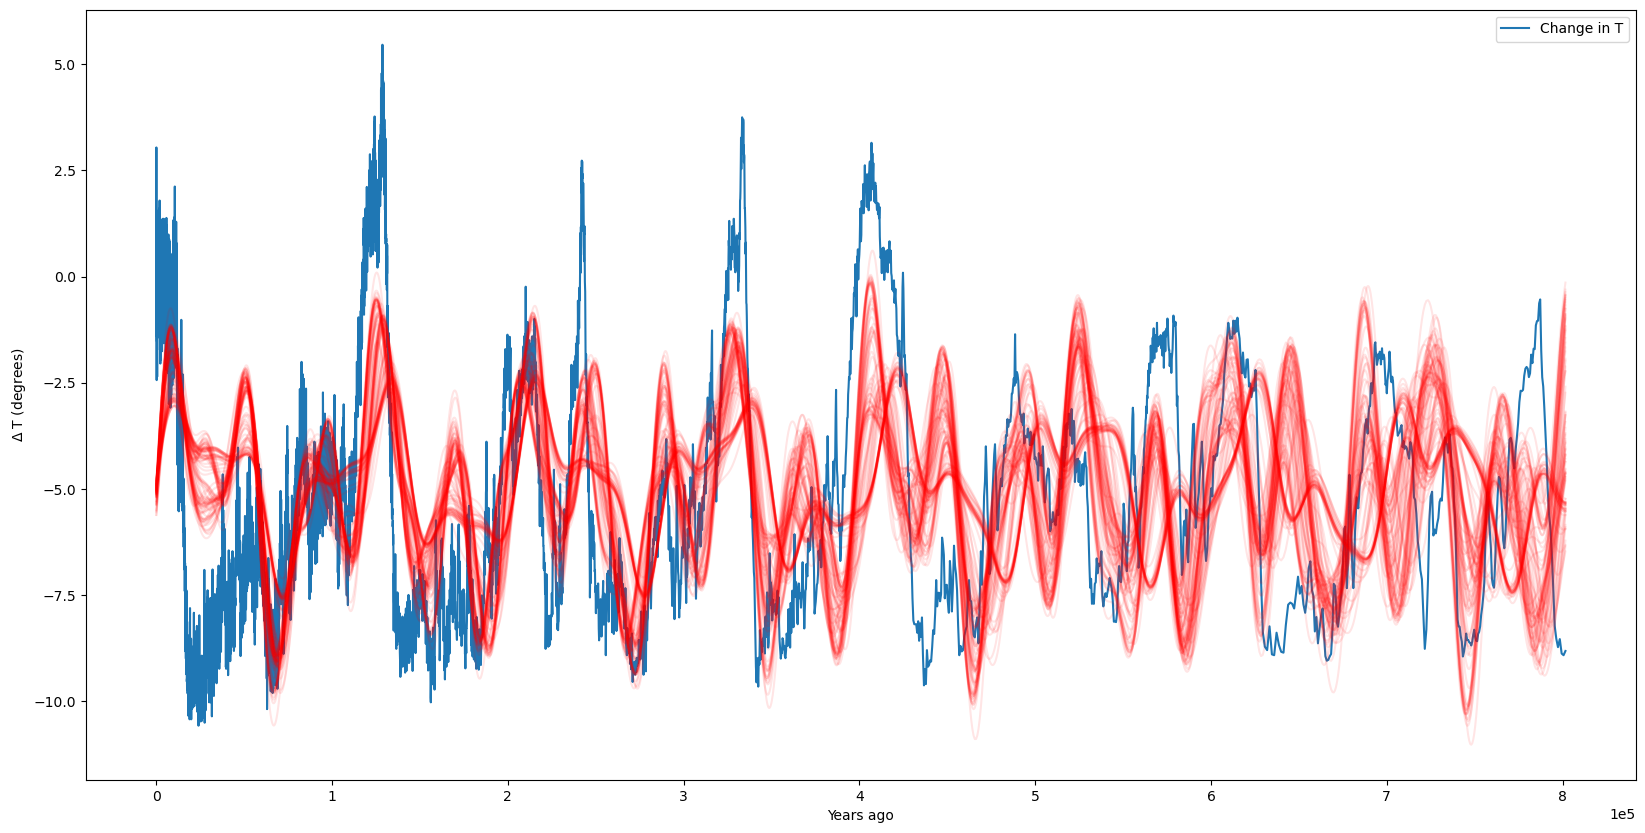

In [9]:
plotter(sampler)

In [10]:
samples = sampler.flatchain
samples[np.argmax(sampler.flatlnprobability)]

array([ 1.28777433e+00,  2.07732424e+00,  1.90890551e+00,  2.35073303e+04,
        3.97147627e+04,  9.61862833e+04, -5.22719800e+00])

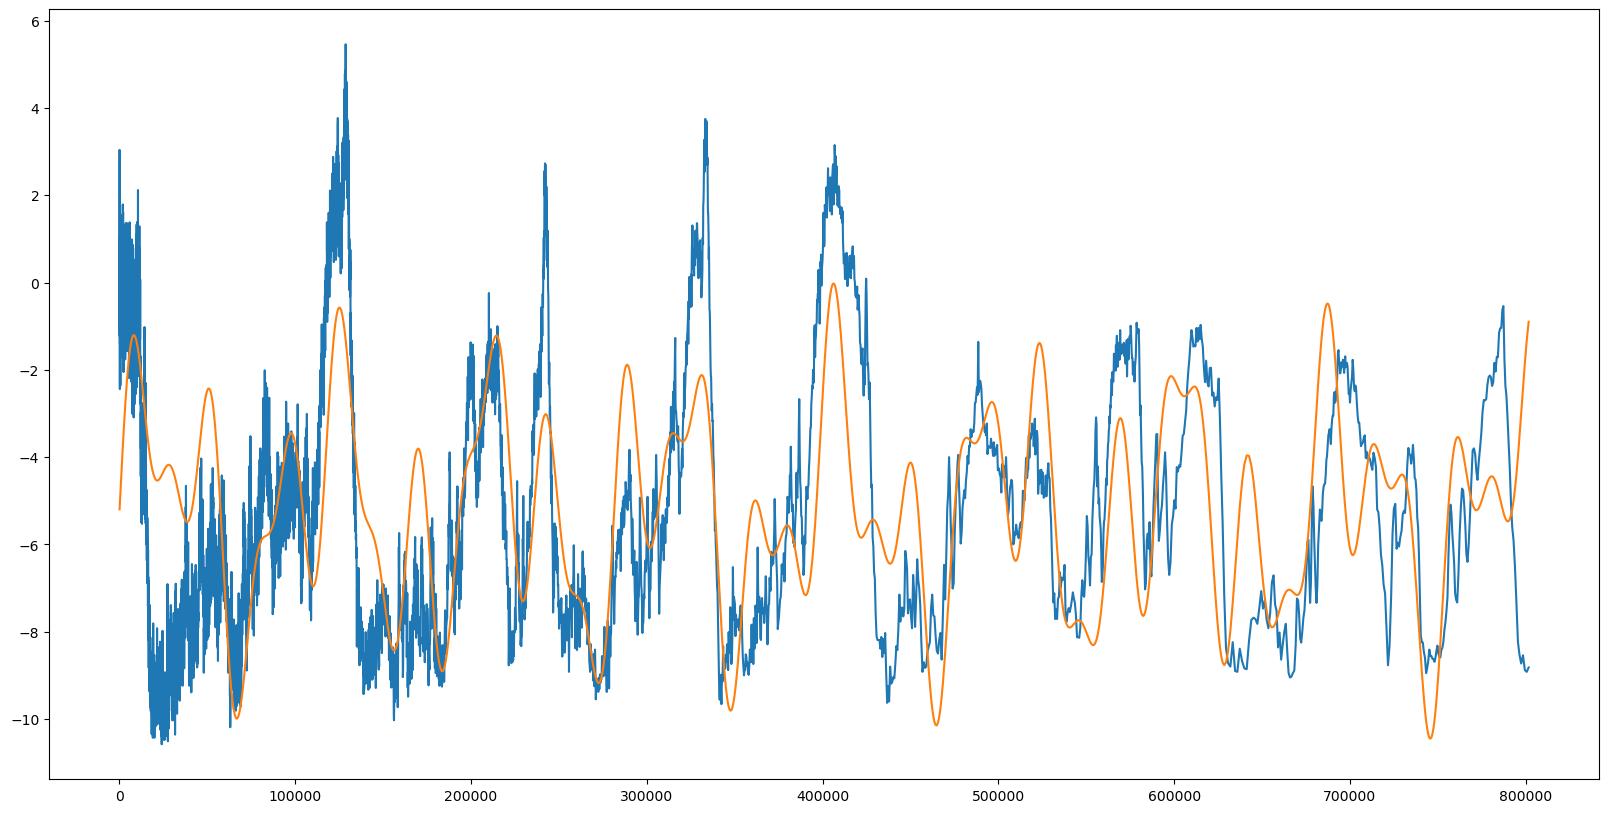

Theta max:  [ 1.28777433e+00  2.07732424e+00  1.90890551e+00  2.35073303e+04
  3.97147627e+04  9.61862833e+04 -5.22719800e+00]


In [11]:
samples = sampler.flatchain

theta_max  = samples[np.argmax(sampler.flatlnprobability)]
best_fit_model = model(theta_max)
plt.plot(age,T,label='Change in T')
plt.plot(age,best_fit_model,label='Highest Likelihood Model')
plt.show()
print ('Theta max: ',theta_max)

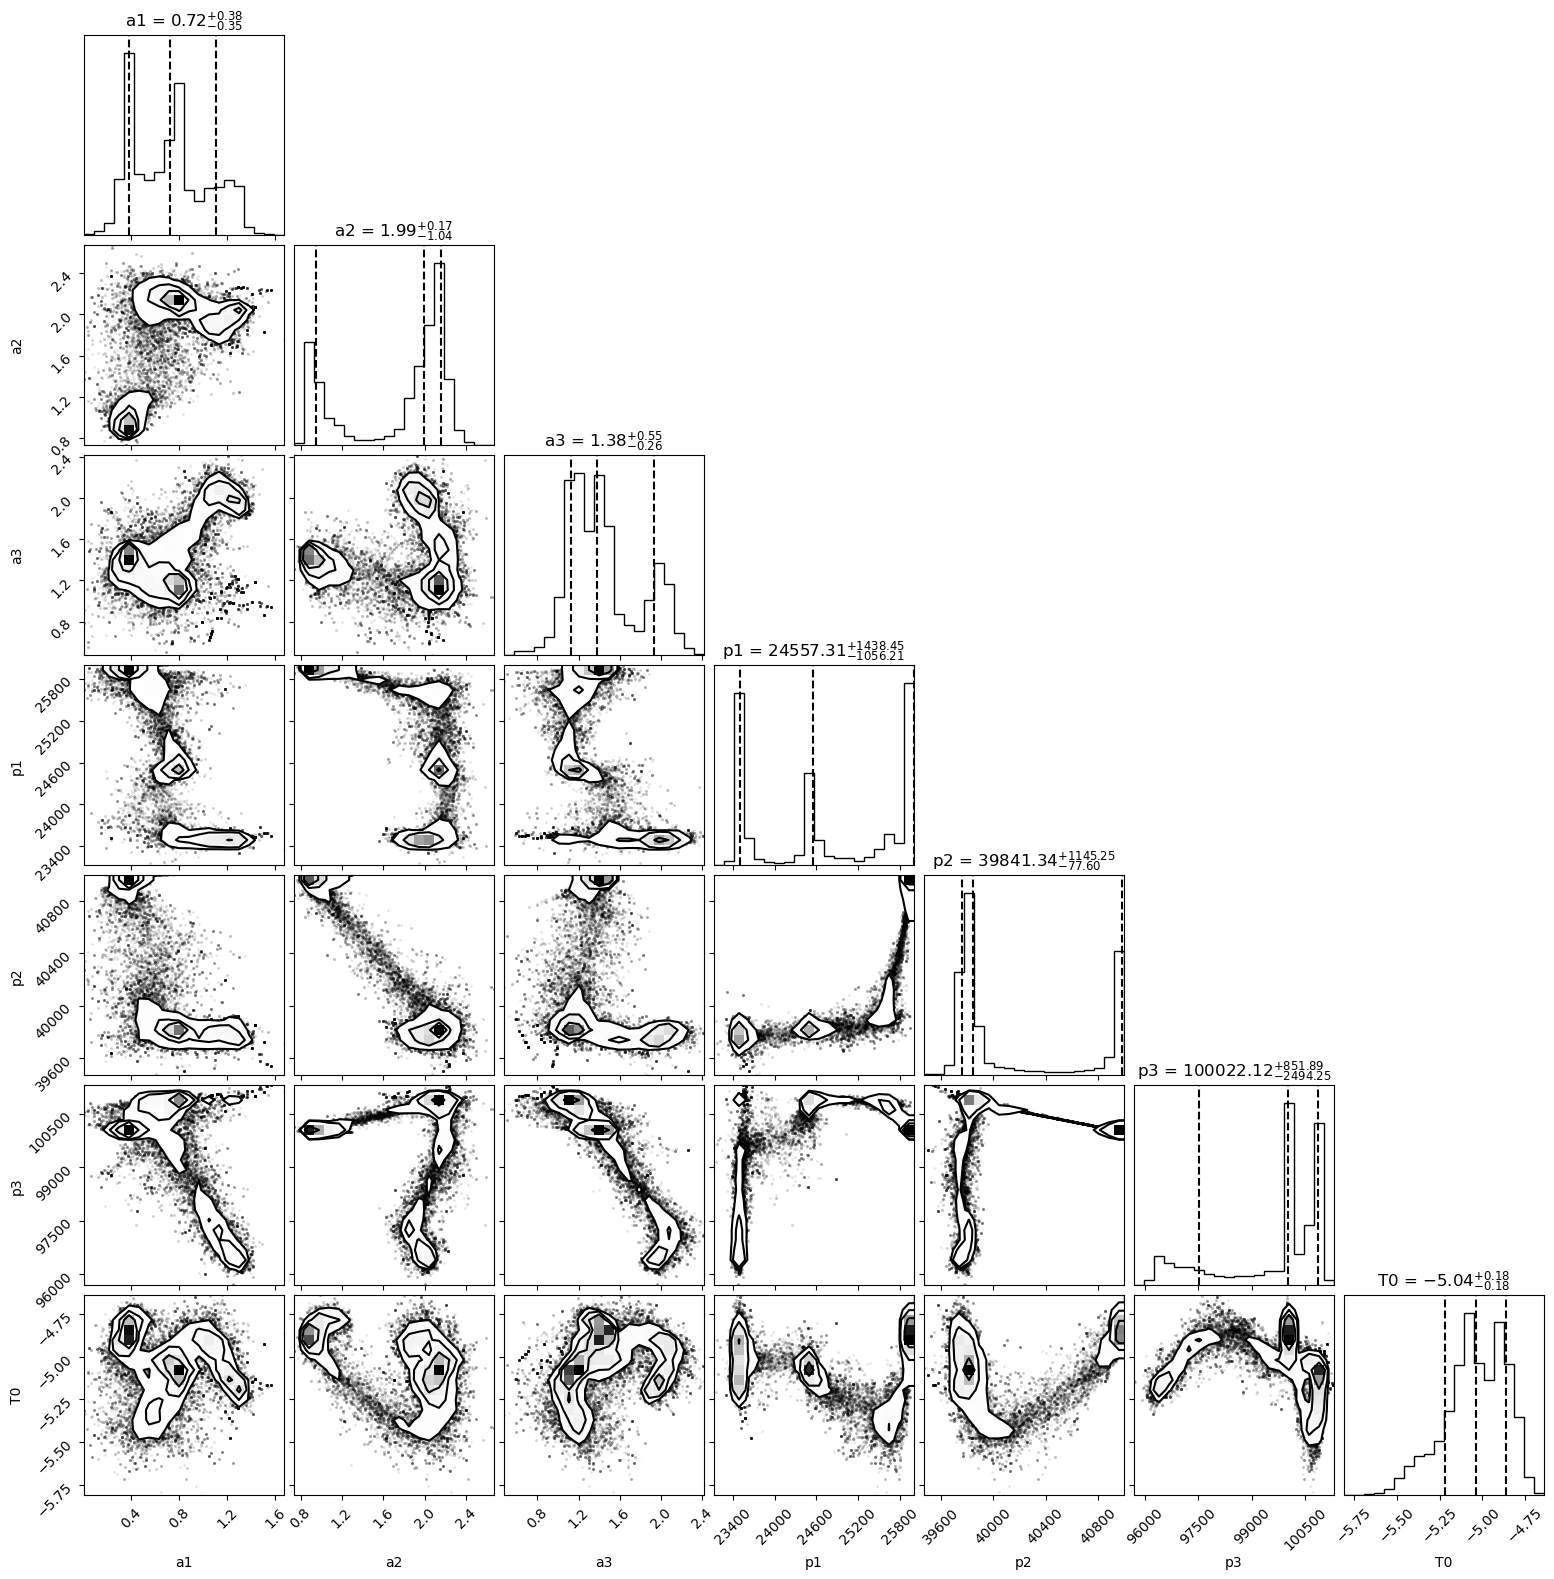

In [12]:
labels = ['a1','a2','a3','p1','p2','p3','T0']
fig = corner.corner(samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [13]:
Terr = 0.05*np.mean(T)
data = (age, T,Terr)
nwalkers = 240
niter = 1024
initial = np.array([1.0, 1.0, 1.0, 26000., 41000.,100000.,-4.5])
ndim = len(initial)
p0 = [np.array(initial) + 1e-7 * np.random.randn(ndim) for i in range(nwalkers)]
new_sampler, newpos, newprob, newstate = main(p0,nwalkers,niter,ndim,lnprob,data)

Running burn-in...
Running production...


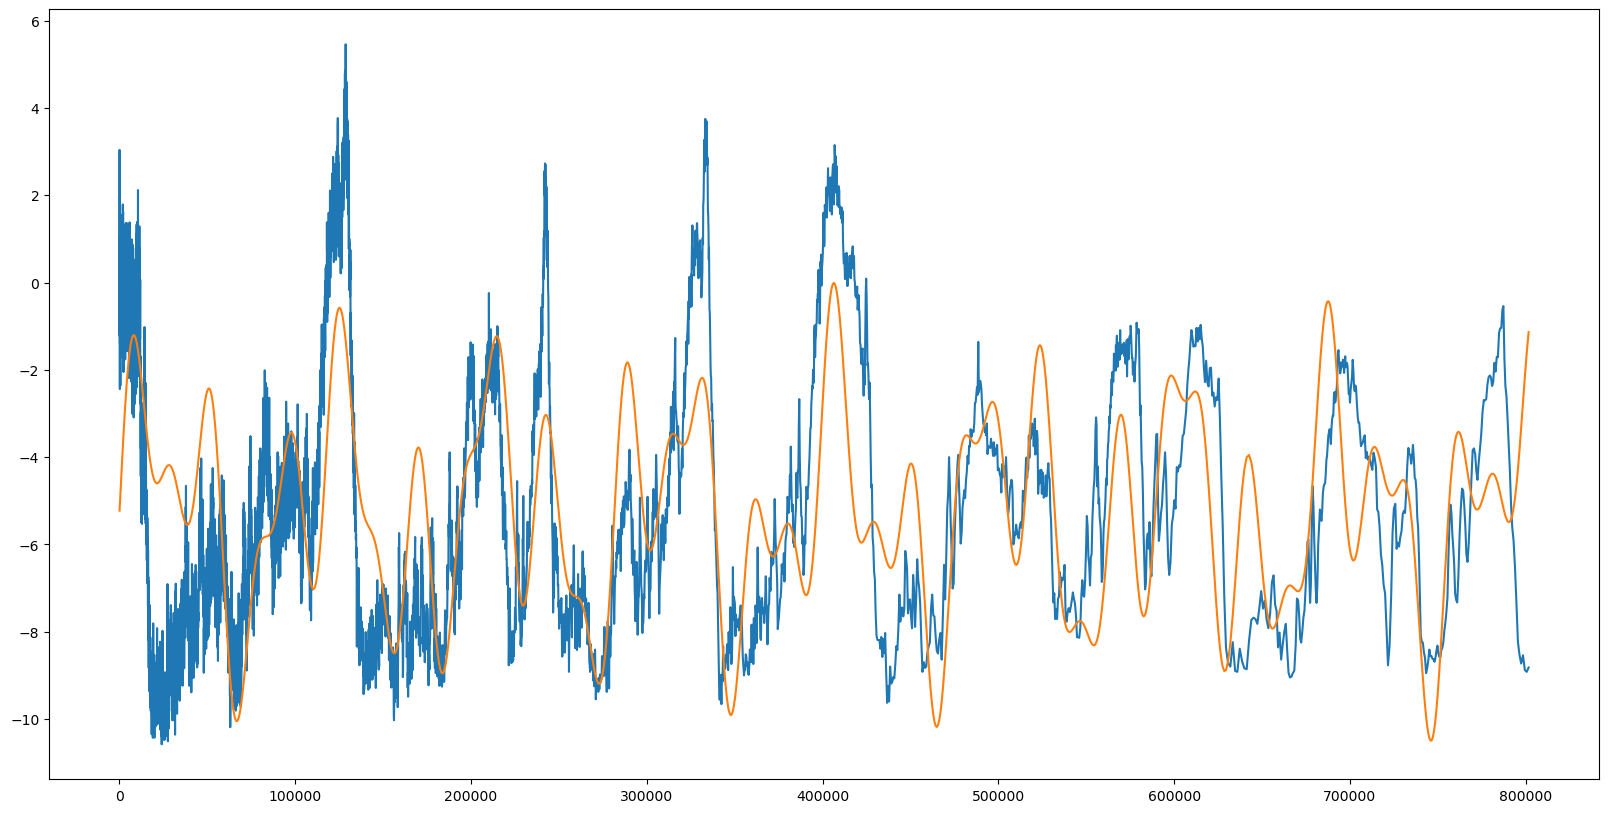

Theta max:  [ 1.32754910e+00  2.07999772e+00  1.89655241e+00  2.35214848e+04
  3.97331817e+04  9.61310980e+04 -5.25644889e+00]


In [14]:
new_samples =  new_sampler.flatchain

new_theta_max  = new_samples[np.argmax(new_sampler.flatlnprobability)]
new_best_fit_model = model(new_theta_max)
plt.plot(age,T,label='Change in T')
plt.plot(age,new_best_fit_model,label='Highest Likelihood Model')
plt.show()
print ('Theta max: ',new_theta_max)

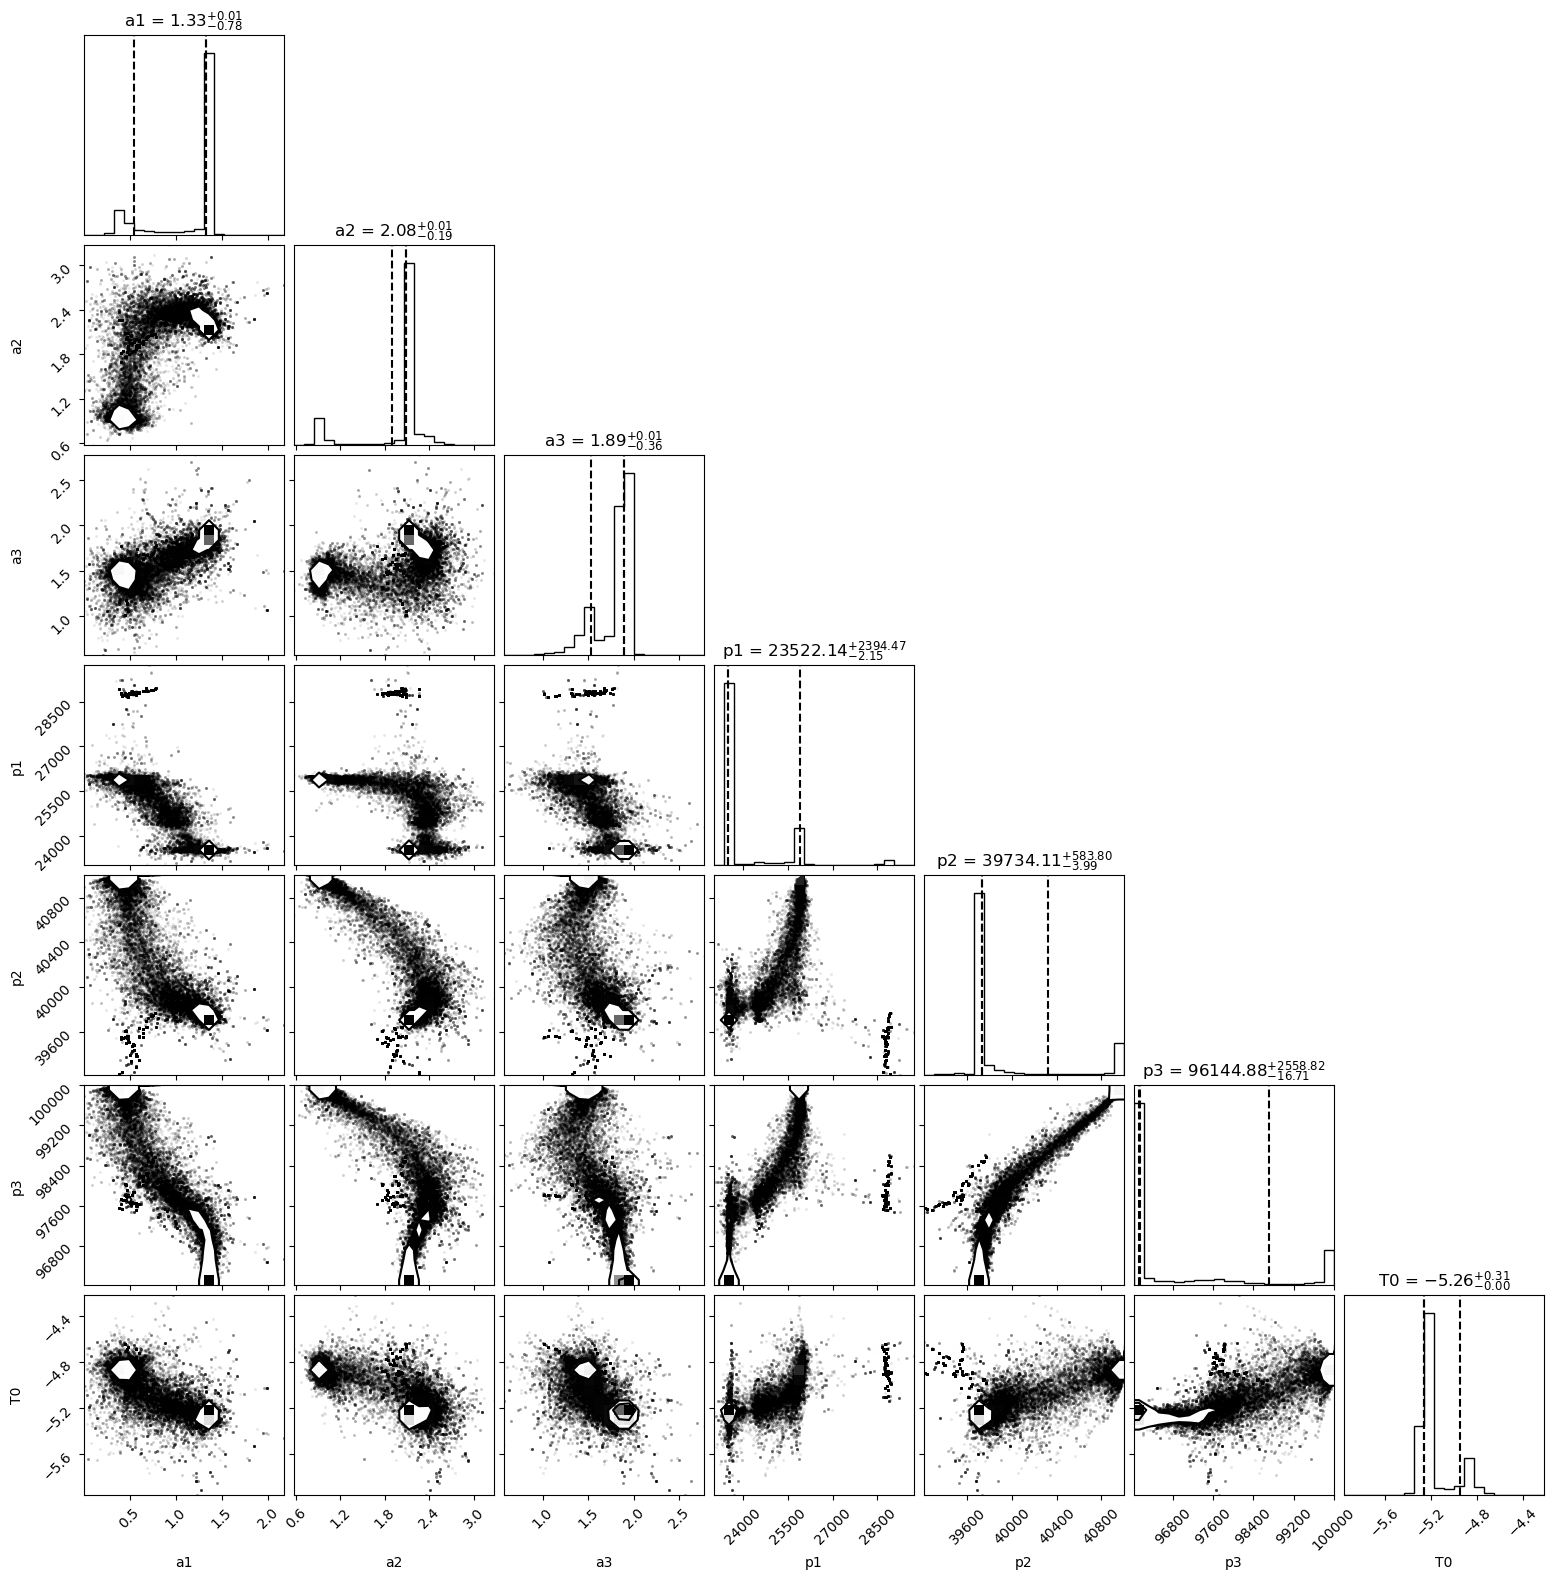

In [15]:
labels = ['a1','a2','a3','p1','p2','p3','T0']
fig = corner.corner(new_samples,show_titles=True,labels=labels,plot_datapoints=True,quantiles=[0.16, 0.5, 0.84])

In [16]:
def sample_walkers(nsamples,flattened_chain):
    models = []
    draw = np.floor(np.random.uniform(0,len(flattened_chain),size=nsamples)).astype(int)
    thetas = flattened_chain[draw]
    for i in thetas:
        mod = model(i)
        models.append(mod)
    spread = np.std(models,axis=0)
    med_model = np.median(models,axis=0)
    return med_model,spread
med_model, spread = sample_walkers(100,new_samples)

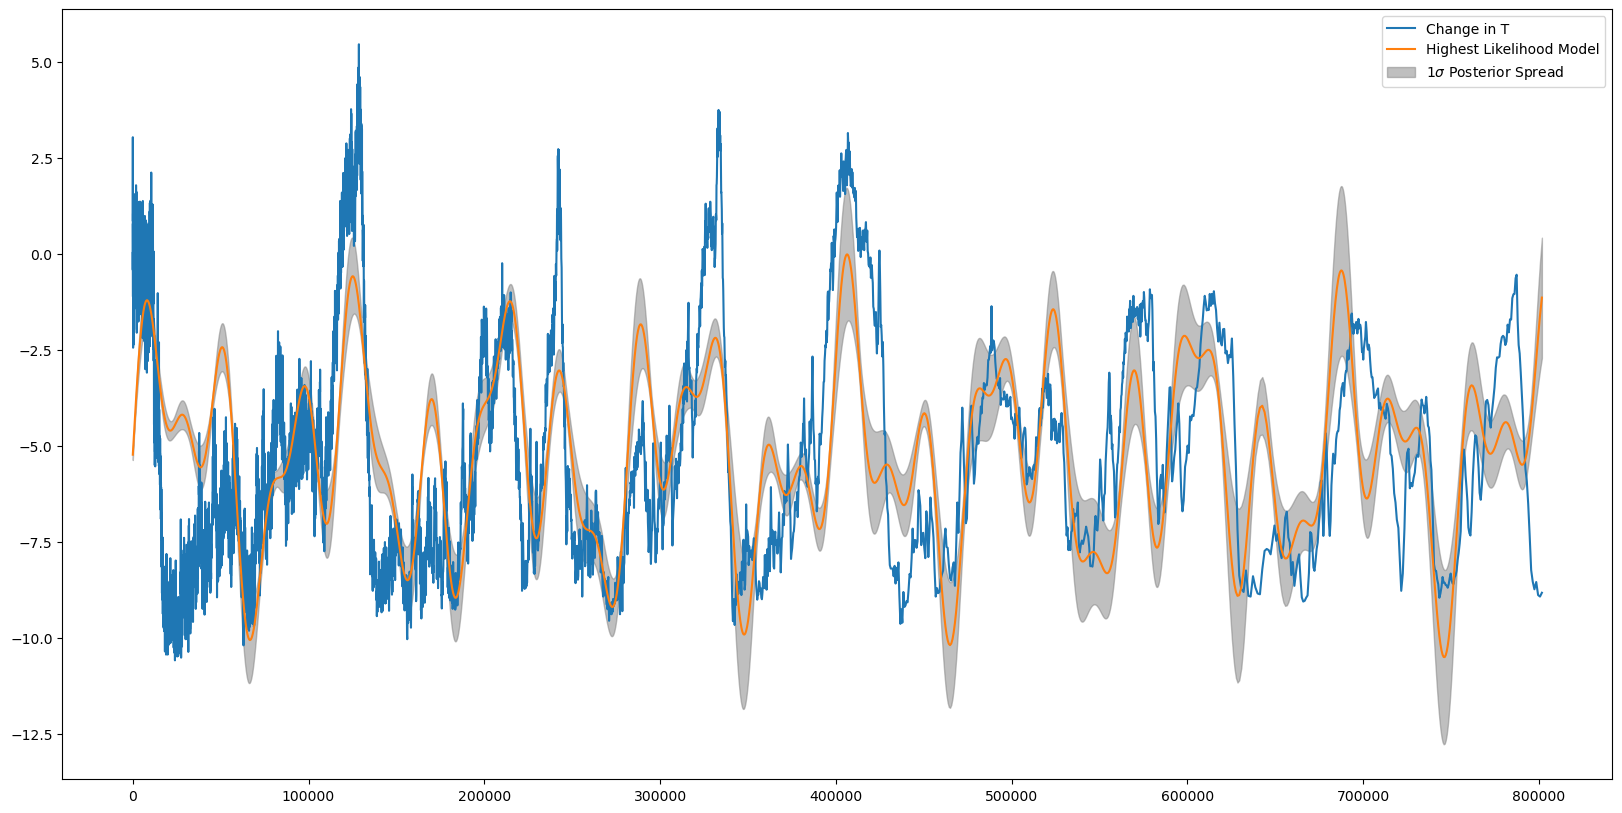

In [17]:
plt.plot(age,T,label='Change in T')
plt.plot(age,new_best_fit_model,label='Highest Likelihood Model')
plt.fill_between(age,med_model-spread,med_model+spread,color='grey',alpha=0.5,label=r'$1\sigma$ Posterior Spread')
plt.legend()

In [23]:
end_time = time.time()
elapsed_time = (end_time - start_time)/60
print(f"Elapsed time (time.time()): {elapsed_time:.6f} minutes")

Elapsed time (time.time()): 6.703542 minutes
